In [13]:
import sys
from pathlib import Path

# Add src/ to the Python path
sys.path.append(str(Path().resolve() / "src"))
sys.path.append(str(Path().resolve() / "data"))


In [14]:
import pandas as pd

df = pd.read_csv(r"data\transactions.csv")
df[df.select_dtypes('object').columns] = df.select_dtypes('object').apply(lambda x: x.str.strip())
df

,payout_time,character,transaction_type,resource,value,notes
0,2025-12-18 19:54:00,Crux,RECIEVE,eddies,325,"""Redwall: Medical Capital"""
1,2025-12-18 19:54:00,Crux,RECIEVE,IP,30,"""Redwall: Medical Capital"""
2,2025-12-18 19:54:00,Crux,RECIEVE,HEAT,20,"""Redwall: Medical Capital"""
3,2025-12-18 19:54:00,Crux,RECIEVE,DT,7,"""Redwall: Medical Capital"""
4,2025-12-18 19:54:00,Crux,RECIEVE,eddies,300,"""M: AdZep Takeover"""
...,...,...,...,...,...,...
70,2026-01-06 01:53:00,Crux,SPEND,eddies,50,To: Kenshi; Speedheal
71,2026-01-06 02:31:00,Crux,SPEND,eddies,40,To: Guy; Speedheal
72,2026-01-08 00:00:00,Crux,RECIEVE,eddies,440,Sean: Home After The Holidays
73,2026-01-08 00:00:00,Crux,RECIEVE,HEAT,5,Sean: Home After The Holidays


In [15]:
def prepare_data(df: pd.DataFrame, resource: str) -> pd.DataFrame:

    result: pd.DataFrame = df.copy()
    result = result.loc[result['resource'] == resource]

    result.loc[result['transaction_type'] == "SPEND", 'value'] = result['value'] * -1

    result = result[['payout_time','resource','value']]
    result.loc[:, 'payout_time'] = pd.to_datetime(result['payout_time'])

    result = result.sort_values(by='payout_time')
    result['running_total'] = result['value'].cumsum()

    return result

In [16]:
prepare_data(df, 'eddies')

,payout_time,resource,value,running_total
26,2025-12-13 20:29:00,eddies,1050,1050
27,2025-12-14 05:26:00,eddies,-25,1025
53,2025-12-14 23:59:00,eddies,-90,935
54,2025-12-16 00:59:00,eddies,-170,765
28,2025-12-16 18:58:00,eddies,-100,665
29,2025-12-17 20:15:00,eddies,-50,615
31,2025-12-17 20:32:00,eddies,-60,555
30,2025-12-17 20:32:00,eddies,-100,455
32,2025-12-18 02:44:00,eddies,-100,355
33,2025-12-18 03:20:00,eddies,-110,245


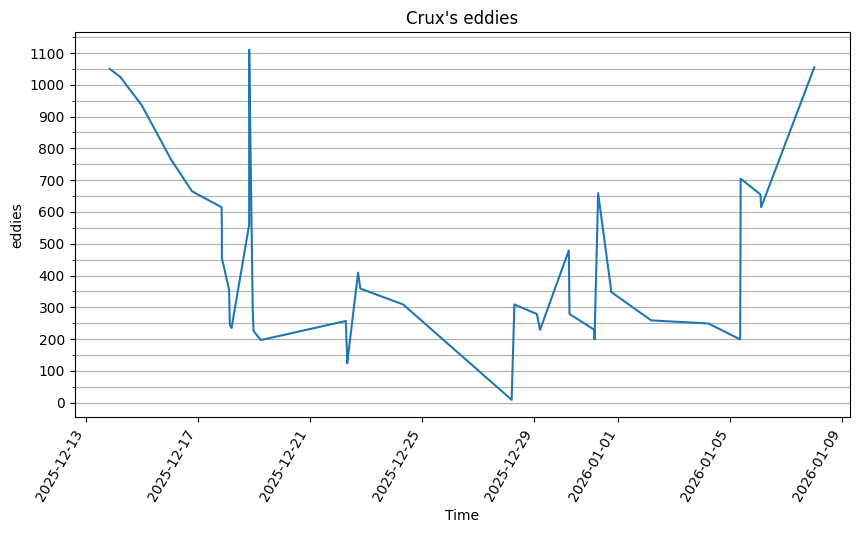

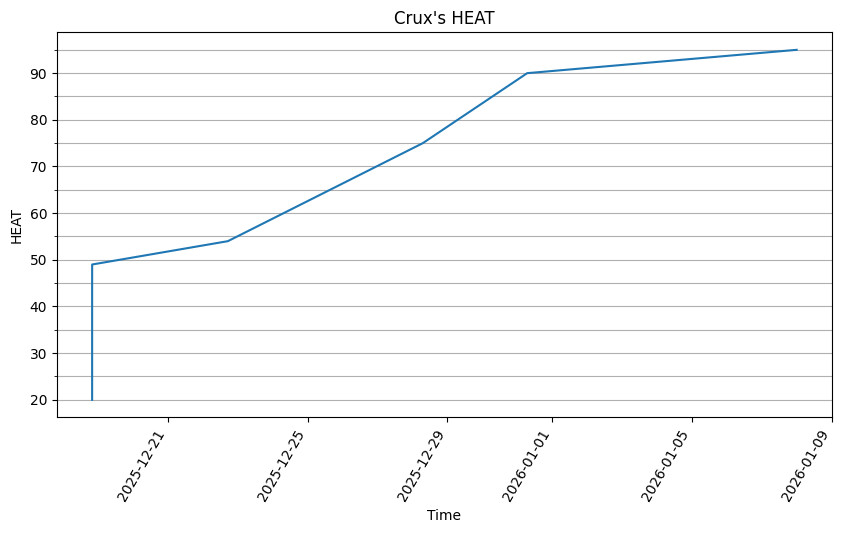

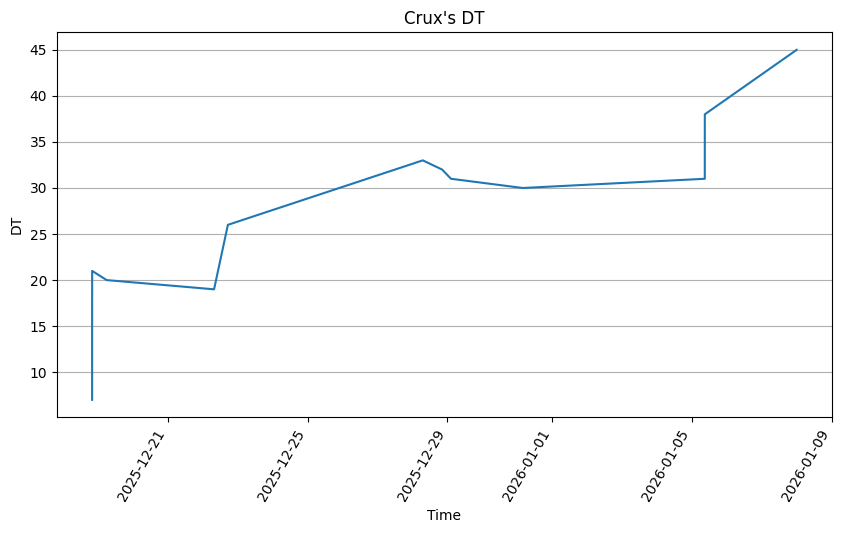

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timezone
import numpy as np
from matplotlib.ticker import MultipleLocator

def foo(resource:str, major_locator:int=100, minor_locator:int = 50) -> None:
    wallet = prepare_data(df, resource)
    fig = plt.figure(figsize=(10, 5))

    x_values = wallet['payout_time']
    y_values = wallet['running_total']

    plt.xticks(rotation=60, ha='right')
    plt.xlabel("Time")
    plt.ylabel(resource)

    plt.title(f"Crux's {resource}")

    ax = plt.gca()

    ax.yaxis.set_major_locator(MultipleLocator(major_locator))
    ax.yaxis.set_minor_locator(MultipleLocator(minor_locator))

    plt.grid(axis='y',which='both')

    plt.plot(x_values, y_values)

foo("eddies", 100, 50)
foo("HEAT", 10, 5)
foo("DT", 5, 5)


In [18]:

prepare_data(df, 'DT')

,payout_time,resource,value,running_total
3,2025-12-18 19:54:00,DT,7,7
7,2025-12-18 19:54:00,DT,7,14
11,2025-12-18 19:55:00,DT,7,21
38,2025-12-19 05:54:00,DT,-1,20
42,2025-12-22 07:41:00,DT,-1,19
15,2025-12-22 17:11:00,DT,7,26
19,2025-12-28 07:06:00,DT,7,33
46,2025-12-28 20:23:00,DT,-1,32
48,2025-12-29 02:29:00,DT,-1,31
59,2025-12-31 03:48:00,DT,-1,30


In [19]:

#DV Clear Chance

import numpy as np
from collections import Counter

In [20]:
import numpy as np
import pandas as pd

black_ice = pd.read_csv(r"data\black_ice.csv")
programs = pd.read_csv(r"data\programs.csv")

combined = pd.concat([black_ice, programs])
combined["name"].values

array(['Asp', 'Giant', 'Hellhound', 'Kraken', 'Liche', 'Raven',
       'Scorpion', 'Skunk', 'Wisp', 'Dragon', 'Killer', 'Sabertooth',
       'Eraser', 'See Ya', 'Speedy Gonzalvez', 'Worm', 'Armor', 'Flak',
       'Shield', 'Banhammer', 'Sword', 'DeckKRASH', 'Hellbolt',
       'Nervescrub', 'Poison Flatline', 'Superglue', 'Vrizzbolt'],
      dtype=object)

<h1>Testing the Check</h1>


In [21]:
from cyberpunk.dice import roll_dice
from cyberpunk.check import Check

my_dice = roll_dice([-10], modifiers=[4])
opponent_dice = roll_dice([-10], modifiers=[0]) * -1

my_check = Check([my_dice, opponent_dice], ties_count=False)

print(my_check)
print(my_check.full_stats(key_values=list(range(8)), use_thresholds=True))

DV  : 0
PASS: 73.18% | FAIL: 26.82%

DV  : 0
FAIL  26.82%
   0  77.90%
   1  73.18%
   2  67.64%
   3  61.28%
   4  54.10%
   5  45.90%
   6  38.72%
   7  32.36%
   9  22.10%
  14  9.80%
  18  3.94%
  22  0.92%


<h1>Using Black Ice/Netrunners from File</h1>

In [22]:
import os
print(os.path.exists(r"data\netrunners.json"))

True


In [23]:

try:
    netrunners = pd.read_json(r"data\netrunners.json")
    print(netrunners)
except:
    print("No netrunner file")

       hp  interface programs
Aphex  69          4       {}


In [24]:
from cyberpunk.netrunner import Netrunner

aphex = Netrunner("Aphex", hp=69, interface=4)
print(aphex)

AttributeError: 'Netrunner' object has no attribute '_programs'

In [ ]:
aphex.save()

In [ ]:
aphex_again = Netrunner("Aphex")
print(aphex)

{'name': 'Aphex', 'hp': 69, 'interface': 4, 'programs': {}}


In [ ]:
import pandas as pd
from cyberpunk.black_ice import BlackIce

black_ice = pd.read_csv(r"data\black_ice.csv")
black_ice

,name,class,perception,speed,attack,defense,rez,effect,dice
0,Asp,Anti-Personnel Black ICE,4,6,2,2,15,Destroys a single Program installed on the ene...,NaN
1,Giant,Anti-Personnel Black ICE,2,2,8,4,25,Does 3d6 damage direct to an enemy Netrunner's...,3d6
2,Hellhound,Anti-Personnel Black ICE,6,6,6,2,20,Does 2d6 damage direct to the Netrunner's brai...,2d6
3,Kraken,Anti-Personnel Black ICE,6,2,8,4,30,Does 3d6 damage direct to an enemy Netrunner's...,3d6
4,Liche,Anti-Personnel Black ICE,8,2,6,2,25,"Enemy Netrunner's INT, REF, and DEX are each l...",NaN
5,Raven,Anti-Personnel Black ICE,6,4,4,2,15,Derezzes a single Defender Program the enemy N...,1d6
6,Scorpion,Anti-Personnel Black ICE,2,6,2,2,15,Enemy Netrunner's MOVE is lowered by 1d6 for t...,1d6
7,Skunk,Anti-Personnel Black ICE,2,4,4,2,10,"Until this Program is Derezzed, an enemy Netru...",NaN
8,Wisp,Anti-Personnel Black ICE,4,4,4,2,15,Does 1d6 damage direct to the enemy Netrunner'...,1d6
9,Dragon,Anti-Program Black ICE,6,4,6,6,30,Deals 6d6 damage to a Program. If this damage ...,6d6


In [ ]:
my_black_ice = BlackIce("Kraken")
print(my_black_ice)

Kraken - Anti-Personnel, 8 + 3d6
PER SPD ATK DEF REZ
 6   2   8   4  30 



In [ ]:
from cyberpunk.dv_check import *

calculate_DV_pass(DV=10, dice=[-10], modifiers=[4,2])

Possible Rolls:
[[ 6  8  9 10 11 12 13 14 15 17]
 [ 5  8  9 10 11 12 13 14 15 18]
 [ 4  8  9 10 11 12 13 14 15 19]
 [ 3  8  9 10 11 12 13 14 15 20]
 [ 2  8  9 10 11 12 13 14 15 21]
 [ 1  8  9 10 11 12 13 14 15 22]
 [ 0  8  9 10 11 12 13 14 15 23]
 [-1  8  9 10 11 12 13 14 15 24]
 [-2  8  9 10 11 12 13 14 15 25]
 [-3  8  9 10 11 12 13 14 15 26]]
DV: 10
Chance of Success: 65.93%
Chance of Success w/ Ties: 67.03%


In [ ]:
def roll_against_opponent_and_DV(DV:int, rolls:list):
    
    possibilities = np.array(0)

    for roll in rolls:
        possibilities = np.add.outer(possibilities, roll)

    output_dice_tensor(possibilities)
    output_check_success_odds(possibilities, DV)
        

your_roll = roll_dice(dice=[-10], modifiers=[4])
opponent_roll = roll_dice(dice=[10], modifiers=[2]) * -1

roll_against_opponent_and_DV(DV=0, rolls=[your_roll, opponent_roll])

rolls.shape: (10, 10, 10)
DV: 0
Chance of Success: 62.10%
Chance of Success w/ Ties: 69.30%


In [ ]:
sword = roll_dice(dice=[-10, 6, 6, 6], modifiers=[4])
zap = roll_dice(dice=[-10, 6], modifiers=[4])

print("Sword + Sword")
takedown_odds(attacks=[sword, sword], DEF=2)

print("\n Sword + Zap + Zap")
takedown_odds(attacks=[sword, zap, zap], DEF=2)

Sword + Sword
DMG: 54   Odds: 1.24%
DMG: 48   Odds: 5.46%
DMG: 44   Odds: 11.92%
DMG: 39   Odds: 27.73%
DMG: 37   Odds: 36.97%
DMG: 34   Odds: 52.67%
DMG: 31   Odds: 67.84%
DMG: 29   Odds: 76.30%
DMG: 24   Odds: 90.13%
DMG: 20   Odds: 95.70%
DMG: 14   Odds: 99.16%
Sum of probabilities = 1.0

 Sword + Zap + Zap
DMG: 57   Odds: 1.18%
DMG: 50   Odds: 5.46%
DMG: 46   Odds: 11.15%
DMG: 40   Odds: 27.06%
DMG: 38   Odds: 34.80%
DMG: 34   Odds: 52.77%
DMG: 31   Odds: 66.23%
DMG: 28   Odds: 77.68%
DMG: 23   Odds: 90.64%
DMG: 20   Odds: 95.08%
DMG: 13   Odds: 99.24%
Sum of probabilities = 1.0


In [ ]:

hellhound = roll_dice(dice=[6,6], modifiers=[6])
wisp = roll_dice(dice=[6], modifiers=[4])
kraken = roll_dice(dice=[6,6,6], modifiers=[8])

level_four_netrunner = roll_dice(dice=[10], modifiers=[4])
attacks = [kraken] + [hellhound]*2 + [wisp] 

print("Kraken, Hellhoundx2, Wisp vs. Level 4 Netrunner")
takedown_odds(attacks=attacks, DEF=level_four_netrunner, REZ=40)

Kraken, Hellhoundx2, Wisp vs. Level 4 Netrunner
DMG: 40   Odds: 0.02%
DMG: 32   Odds: 1.37%
DMG: 28   Odds: 5.65%
DMG: 26   Odds: 10.02%
DMG: 22   Odds: 25.06%
DMG: 20   Odds: 35.66%
DMG: 17   Odds: 53.85%
DMG: 15   Odds: 66.02%
DMG: 13   Odds: 76.95%
DMG:  9   Odds: 92.25%
DMG:  7   Odds: 96.35%
DMG:  4   Odds: 99.21%
Sum of probabilities = 0.9999999999999999


In [ ]:

my_defense = roll_dice([-10], [4])
my_defense[my_defense < 0] = 0

takedown_odds(attacks=[hellhound, kraken], REZ=40, DEF=my_defense)

DMG: 40   Odds: 0.01%
DMG: 30   Odds: 1.04%
DMG: 25   Odds: 5.04%
DMG: 22   Odds: 10.82%
DMG: 17   Odds: 29.44%
DMG: 16   Odds: 34.67%
DMG: 13   Odds: 52.58%
DMG: 10   Odds: 70.91%
DMG:  9   Odds: 76.34%
DMG:  5   Odds: 91.88%
DMG:  3   Odds: 95.94%
DMG:  0   Odds: 100.00%
Sum of probabilities = 1.0


In [ ]:
aphex = Netrunner(hp=40, interface=4)
takedown_odds(attacks=[hellhound, kraken], netrunner=aphex)

TypeError: Netrunner.__init__() missing 1 required positional argument: 'name'

In [ ]:
list(range(1, 36, 5)) + [35]

[1, 6, 11, 16, 21, 26, 31, 35]

In [ ]:
import clipboard

def copy_damage_roll(dice:str, weapon:str):
    
    amount, sides = dice.split("d")
    discord_command = f"!r {amount}d{sides} Damage w/ {weapon}"
    clipboard.copy(discord_command)

copy_damage_roll("3d6", "Stungun")


In [ ]:
import pandas as pd

df = pd.read_csv(r"data\weapons.csv")
df

,name,type,quality,modifier,source,banned
0,Air Pistol,Medium Pistol,NaN,NaN,CP:R 347,NaN
1,Dai Lung Streetmaster,Medium Pistol,NaN,NaN,CP:R 342,NaN
2,Duel Caster,Medium Pistol,NaN,NaN,"DL:ElfTCG 9, IR3 73",NaN
3,Federated Arms X-9mm,Medium Pistol,NaN,NaN,CP:R 342,NaN
4,Medium Pistol,Medium Pistol,NaN,NaN,CP:R 341,NaN
...,...,...,...,...,...,...
228,Militech Hotshot L-ATGM,Rocket Launcher,EQ,NaN,TT 25,NaN
229,Militech Starshot L-ATGM-N,Rocket Launcher,EQ,NaN,TT 25,NaN
230,Militech Urban,Rocket Launcher,SQ,NaN,TT 25,NaN
231,Towa Manufacturing Type-R,Rocket Launcher,PQ,NaN,TT 25,NaN


In [ ]:
magnitudes = [-5,3,1,3,-8,0,-1]
nums = []

for num in magnitudes:
    if num >= 0:
        nums.append(f"+{num}")
    else:
        nums.append(f"{num}")

print("".join(nums))

-5+3+1+3-8+0-1


In [ ]:
weapon = "Arasaka Ozere"
weapons_list = pd.read_csv(r"data\weapons.csv")

#print(weapons_list["type"].unique())

for i in range(len(weapon)):
    weapons_list = weapons_list[ 
        weapons_list["name"].str.contains(weapon[:i+1], na=False)
    ]
    if len(weapons_list) <= 1:
        break



weapons_list['type'].iloc[0]

'Bow'